<a href="https://colab.research.google.com/github/chitwan6804/Speech_emotion_recognition/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import necessary dependencies***

In [2]:
# Import Necessary Dependencies
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU

# ***Import Data***

In [3]:
# Load dataset
import kagglehub
ejlok1_toronto_emotional_speech_set_tess_path = kagglehub.dataset_download('ejlok1/toronto-emotional-speech-set-tess')
np.save('datasetpath.npy',ejlok1_toronto_emotional_speech_set_tess_path)

In [4]:
np.load('datasetpath.npy')
# Set base directory
base_dir = ejlok1_toronto_emotional_speech_set_tess_path

In [5]:
# Initialize lists for paths and labels
paths = []
labels = []

# Traverse through the directory
for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0].lower()
        labels.append(label)

In [6]:
# Create a DataFrame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

# ***Going through data***

In [7]:
paths[:5]

['/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_neutral/OAF_wash_neutral.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_neutral/OAF_void_neutral.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_neutral/OAF_bath_neutral.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_neutral/OAF_bean_neutral.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_neutral/OAF_search_neutral.wav']

In [8]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [9]:
df.head()

,speech,label
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,neutral
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,neutral
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,neutral
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,neutral
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,neutral


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('speech').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['label'].value_counts()

,count
label,
neutral,800
sad,800
disgust,800
ps,800
fear,800
angry,800
happy,800


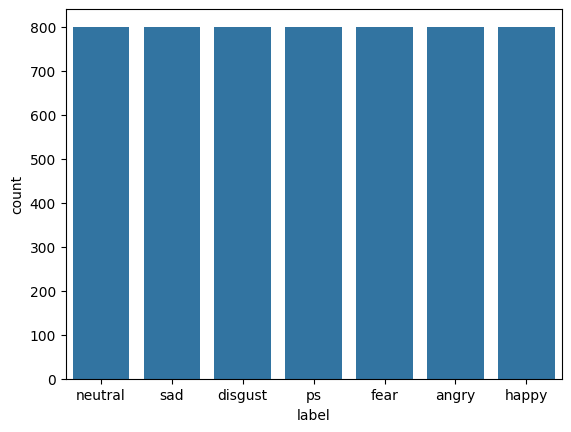

In [ ]:
# Visualize label distribution
sns.countplot(x='label', data=df)
plt.show()

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

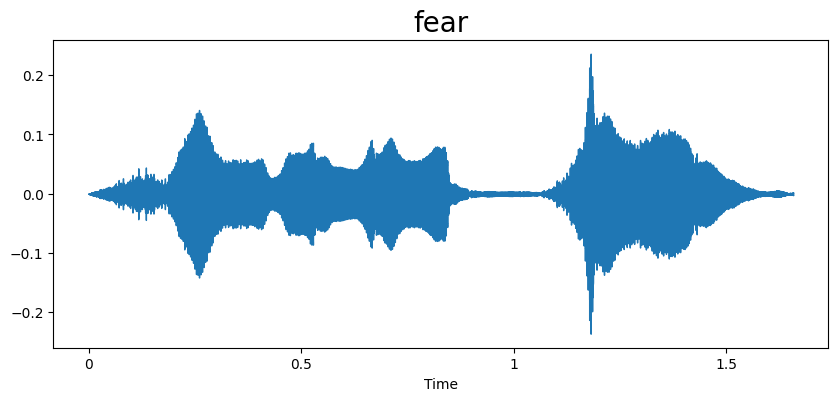

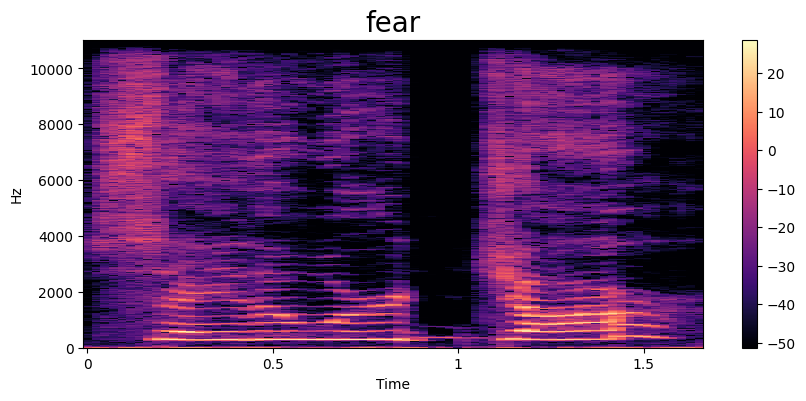

In [ ]:
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

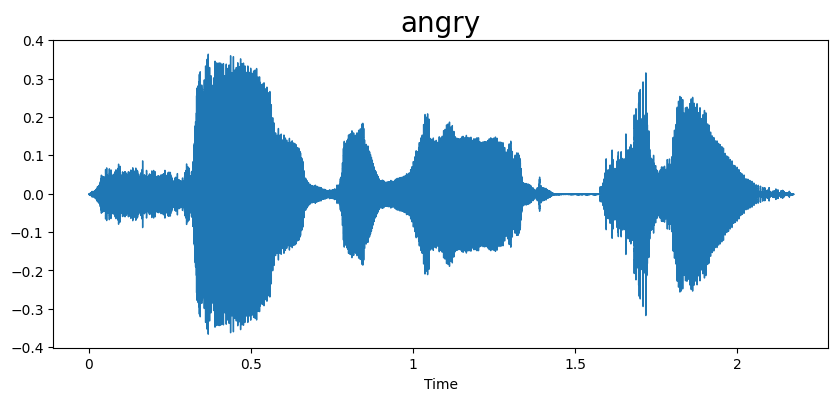

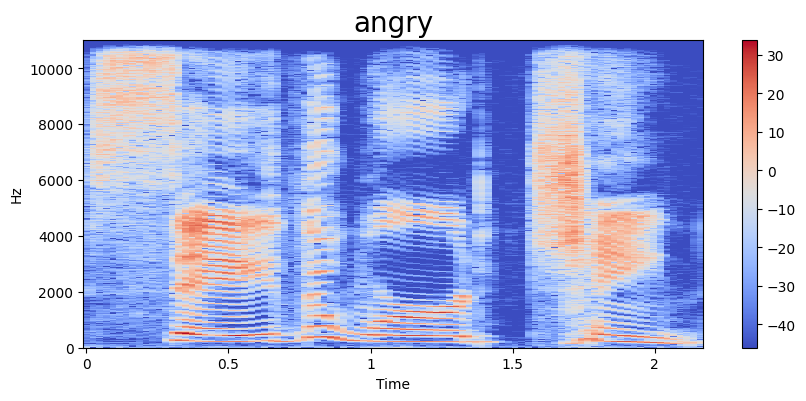

In [ ]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

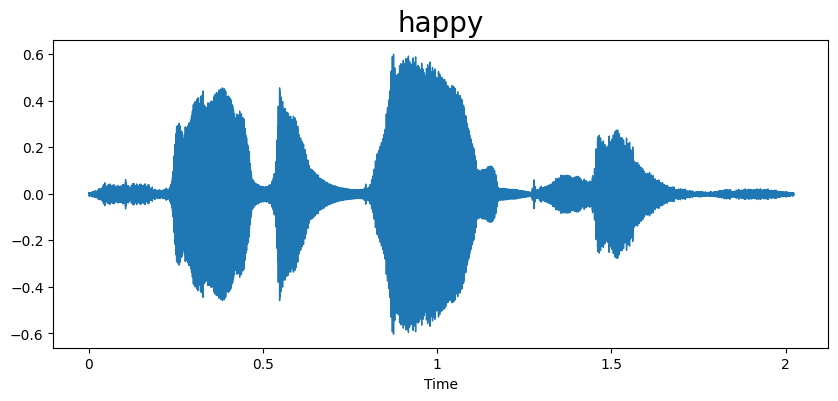

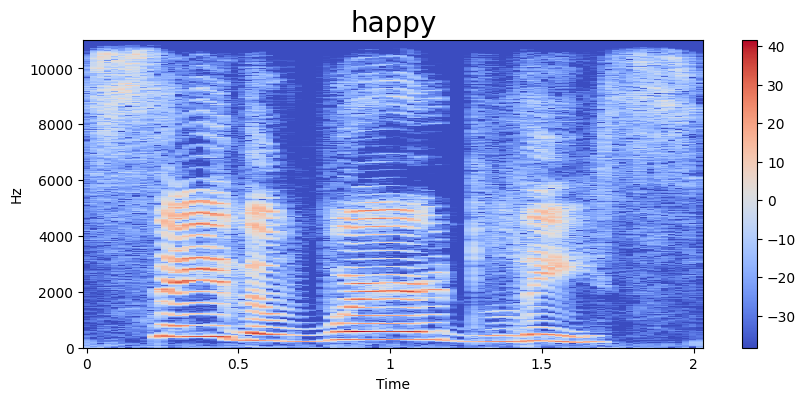

In [ ]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

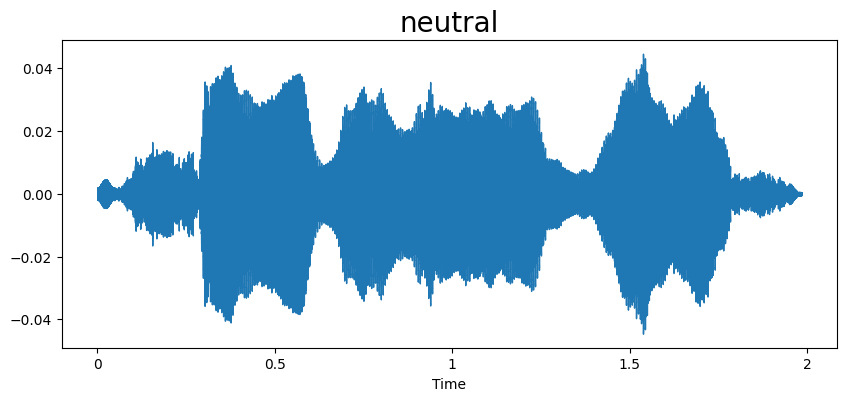

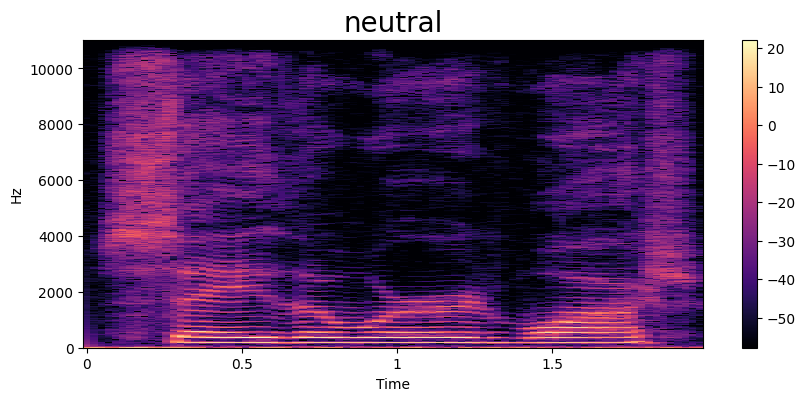

In [ ]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

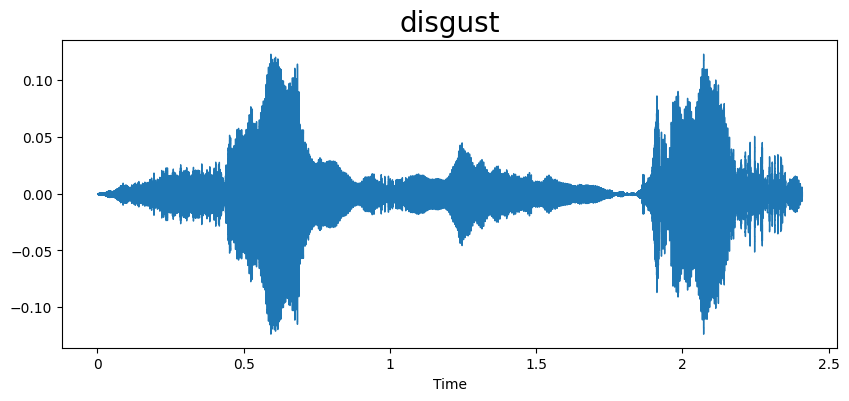

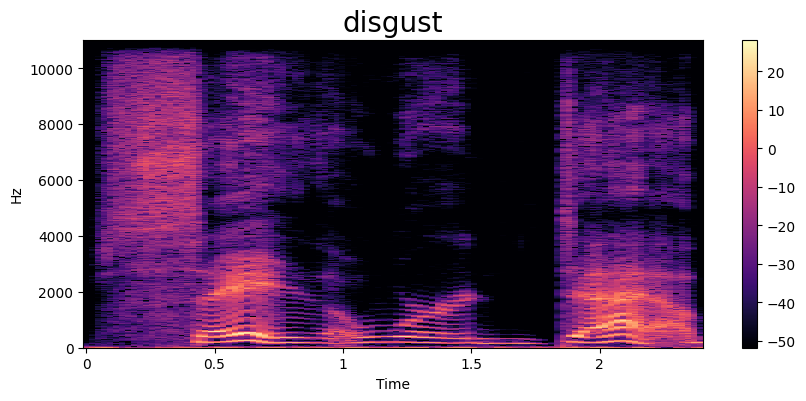

In [ ]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

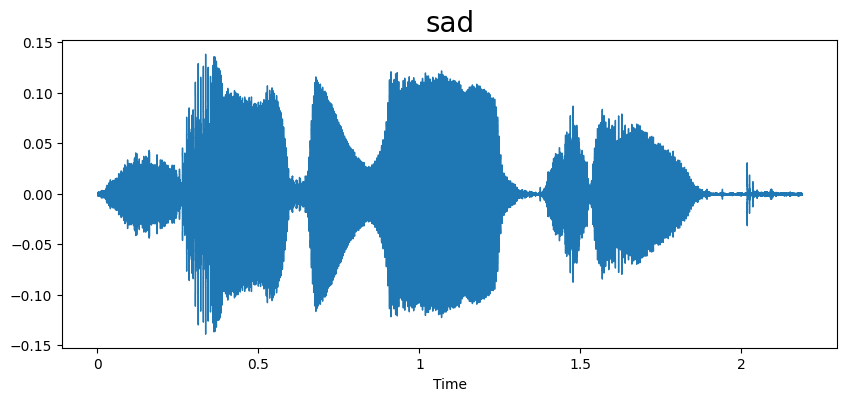

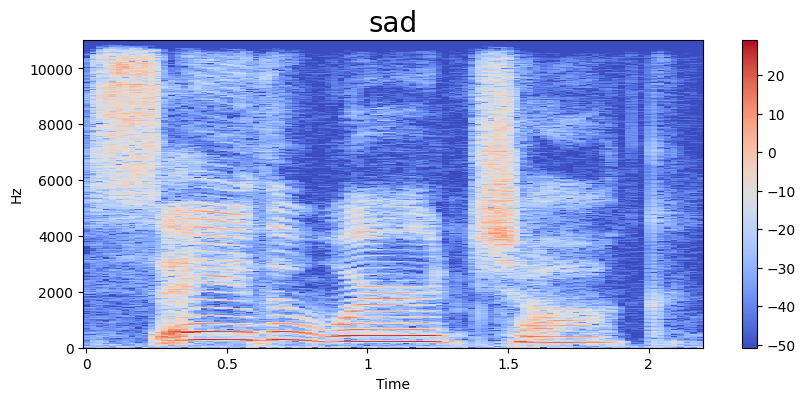

In [ ]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

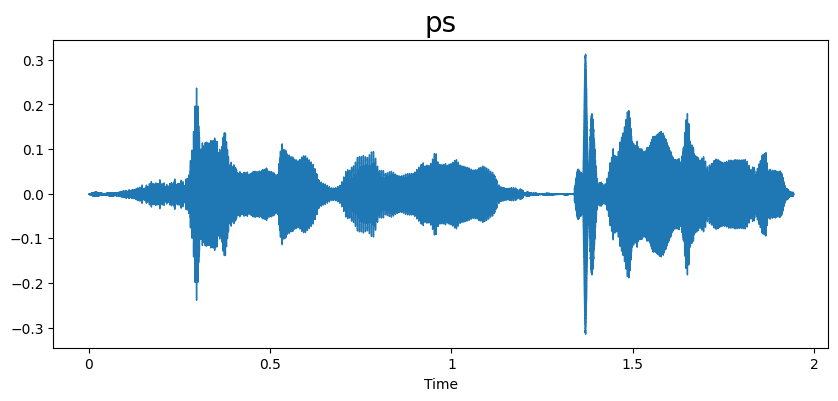

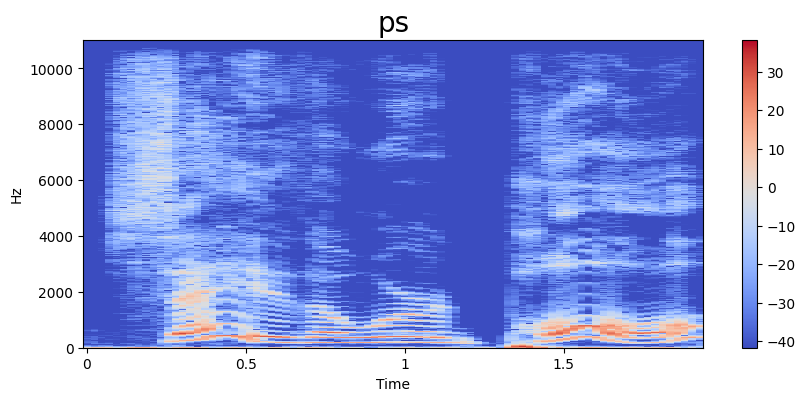

In [ ]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

# ***Feature extraction***

In [ ]:
# Feature Extraction Function
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
# Extract features for the entire dataset
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X = np.array([x for x in X_mfcc])

In [ ]:
X

array([[-514.5419  ,  113.77745 ,   20.301258, ...,   37.960682,
          37.70799 ,   28.471891],
       [-547.4657  ,  105.13651 ,   32.300575, ...,   38.791325,
          35.126938,   38.95212 ],
       [-509.45572 ,   93.61811 ,   13.939519, ...,   37.824905,
          30.103292,   24.105202],
       ...,
       [-521.01794 ,  119.734406,   28.029362, ...,   11.843053,
          10.616495,   13.498112],
       [-559.66943 ,  102.95287 ,   36.221283, ...,   21.53166 ,
          16.105473,   21.335133],
       [-530.7035  ,  110.78314 ,   33.72981 , ...,   12.642265,
          16.444284,   19.206356]], dtype=float32)

In [ ]:
X.shape

(5600, 40)

In [ ]:
# Reshape X
X = np.expand_dims(X, -1)
X
X.shape

(5600, 40, 1)

In [ ]:
# One-hot encode labels
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()
y.shape

(5600, 7)

# ***Split dataset so that it could be used***

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
# Save numpy arrays individually
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

# ***Train the model***

In [ ]:
X_train=np.load('X_train.npy')
Y_train=np.load('y_train.npy')
X_test=np.load('X_test.npy')
Y_test=np.load('y_test.npy')

In [ ]:
# Model definition (LSTM)
model1 = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model1.fit(X_train, y_train, validation_split=0.2, epochs= 60, batch_size=64, shuffle=True)
model1.save('model1.h5')

Epoch 1/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.4510 - loss: 1.3942 - val_accuracy: 0.8917 - val_loss: 0.2750
Epoch 2/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.8920 - loss: 0.3137 - val_accuracy: 0.9643 - val_loss: 0.0981
Epoch 3/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.9396 - loss: 0.1707 - val_accuracy: 0.9754 - val_loss: 0.0846
Epoch 4/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - accuracy: 0.9577 - loss: 0.1348 - val_accuracy: 0.9844 - val_loss: 0.0650
Epoch 5/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 182ms/step - accuracy: 0.9703 - loss: 0.1038 - val_accuracy: 0.9799 - val_loss: 0.0623
Epoch 6/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.9646 - loss: 0.1227 - val_accuracy: 0.9844 - val_loss: 0.0556
Epoch 7/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.9754 - loss: 0.0967 - val_accuracy: 0.9821 - val_loss: 0.0621
Epoch 8/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.9774 - loss: 0.0780 - val_accur

# ***Testing the results***

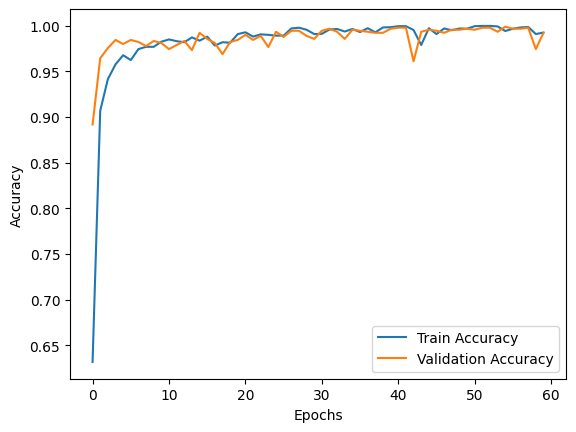

In [ ]:
from keras.models import load_model

# Load the saved model
model1 = load_model('model1.h5')

# Get the correct number of epochs from the history
epochs = list(range(len(history.history['accuracy'])))

# Get accuracy and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot train and validation accuracy
plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

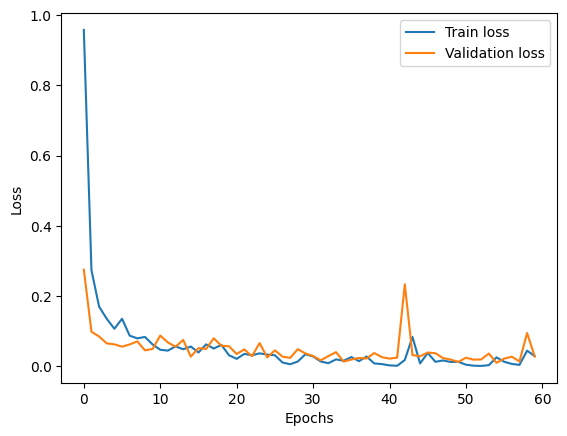

In [ ]:
# Get the correct number of epochs from the history
epochs = list(range(len(history.history['loss'])))

# Get accuracy and validation accuracy
acc = history.history['loss']
val_acc = history.history['val_loss']

# Plot train and validation accuracy
plt.plot(epochs, acc, label='Train loss')
plt.plot(epochs, val_acc, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9897 - loss: 0.0595
Test Loss: 0.0501810722053051, Test Accuracy: 0.9901785850524902


In [ ]:
def display_predictions(df, X_test, y_test, num_samples=5):
    for i in range(num_samples):
        # Pick a random sample index
        idx = random.randint(0, len(X_test) - 1)

        # Get the path and the actual label from the original DataFrame using the test index
        path = df['speech'].iloc[idx]  # Fetch the path using the original DataFrame
        actual_label = df['label'].iloc[idx]  # Fetch the corresponding label

        # Load the original audio file for playback
        audio_data, sr = librosa.load(path, duration=3, offset=0.5)

        # Prepare the MFCC feature for model prediction
        mfcc = extract_mfcc(path)
        mfcc = np.expand_dims(mfcc, axis=0)  # Reshape to match input shape

        # Predict using the model
        predicted_probabilities = model1.predict(mfcc)
        predicted_label_index = np.argmax(predicted_probabilities)

        # Convert predicted label index to actual emotion label
        predicted_label = enc.categories_[0][predicted_label_index]

        # Play the original audio file
        print(f"Playing sample: {path}")
        display(Audio(audio_data, rate=sr))

        # Print actual vs predicted result
        print(f"Actual Label: {actual_label}")  # Display actual label from the DataFrame
        print(f"Predicted Label: {predicted_label}")  # Display predicted label

# Call the function to display predictions
display_predictions(df, X_test, y_test, num_samples=3)  # Change num_samples as needed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Playing sample: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_disgust/OAF_whip_disgust.wav


Actual Label: disgust
Predicted Label: disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Playing sample: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Fear/OAF_turn_fear.wav


Actual Label: fear
Predicted Label: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Playing sample: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/OAF_Fear/OAF_base_fear.wav


Actual Label: fear
Predicted Label: fear


In [ ]:
import numpy as np
import librosa
from IPython.display import Audio
from google.colab import files

# Function to predict emotion from uploaded audio
def predict_user_audio(file_path):
    # Load the audio file provided by the user
    audio_data, sr = librosa.load(file_path, duration=3, offset=0.5)

    # Play the uploaded audio file for the user to hear
    display(Audio(audio_data, rate=sr))

    # Extract MFCC features from the audio file
    mfcc = extract_mfcc(file_path)
    mfcc = np.expand_dims(mfcc, axis=0)  # Reshape to match input shape

    # Predict the emotion using the pre-trained model
    predicted_probabilities = model1.predict(mfcc)
    predicted_label_index = np.argmax(predicted_probabilities)

    # Convert predicted label index to actual emotion label
    predicted_label = enc.categories_[0][predicted_label_index]

    # Display the predicted emotion
    print(f"Predicted Emotion: {predicted_label}")

# Upload audio file from user
uploaded = files.upload()

# Assume the user uploads a .wav file
for filename in uploaded.keys():
    # Call the function to predict emotion from uploaded audio file
    predict_user_audio(filename)


Saving 1.wav to 1.wav


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted Emotion: angry
